In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Mouna\Desktop\Masters\Spring2019\Project Work\irma_coded_tweets.csv',dtype='str',encoding='utf-8',error_bad_lines=False,keep_default_na=False)
df['t']=df['tweet'].str.replace('http\S+|www.\S+', '', case=False)
df['t'] = df['t'].str.replace('@', ' ')
df['t'] = df['t'].str.replace('#', ' ')
df['t']=df['t'].str.lower()
from textblob import TextBlob
def split_into_lemmas(message):
    #message=message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]
df['t']=df['t'].apply(split_into_lemmas)

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stop = stopwords.words('english')
stemmer = SnowballStemmer("english")
df['t']=df['t'].apply(lambda x: [item for item in x if item not in stop])
df['t'] = df['t'].apply(lambda x: [stemmer.stem(y) for y in x])
df['len']=df['t'].str.len()
df.drop(df[df['len']<=2].index,inplace=True)
tweets = df['t'].tolist()
tweets = [[i for i in nested if len(i) > 2] for nested in tweets]

In [2]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora, models , similarities
import gensim
def bigrams(words, bi_min=10, tri_min=10):
    bigram = Phrases(words, min_count = bi_min)
    bigram_mod = Phraser(bigram)
    return bigram_mod
    
def get_corpus(df):
    words=df
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = corpora.Dictionary(bigram)
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus(tweets)

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
lda_model = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=150,
                           id2word=train_id2word,
                           workers=7, # Num. Processing Cores - 1
                           per_word_topics=True)

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [4]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
def hellinger(X):
    return squareform(pdist(np.sqrt(X)))/np.sqrt(2)

lda_lambda = lda_model.state.get_lambda()
#print(lda_lambda)
lda_lambda = lda_lambda / lda_lambda.sum(axis=1)[:, np.newaxis] # normalize vector
print("topic probability",lda_lambda)
h = hellinger(lda_lambda)
print(h)

import itertools as itt
topics = []
for each in range(lda_model.num_topics):
    topics.append('Topic_'+str(each))

edges = [(i, j, {'weight': float(1 - h[i,j])})
         for i, j in itt.combinations(range(lda_model.num_topics), 2)]

topic probability [[  8.36878644e-06   8.36878644e-06   8.36878644e-06 ...,   8.36878644e-06
    8.36878644e-06   8.36878644e-06]
 [  6.01208603e-06   6.01208603e-06   6.01208603e-06 ...,   6.01208603e-06
    6.01208603e-06   6.01208603e-06]
 [  6.56891461e-06   6.56891461e-06   6.56891461e-06 ...,   6.56891461e-06
    6.56891461e-06   6.56891461e-06]
 ..., 
 [  7.17541479e-06   8.62634915e-04   7.17541479e-06 ...,   7.17541479e-06
    7.17541479e-06   7.17541479e-06]
 [  8.22164111e-06   8.22164111e-06   8.22164111e-06 ...,   8.22164111e-06
    8.22164111e-06   8.22164111e-06]
 [  9.60928719e-06   9.60928719e-06   9.60928719e-06 ...,   9.60928719e-06
    9.60928719e-06   9.60928719e-06]]
[[ 0.          0.70971551  0.70576709 ...,  0.69906432  0.6929018
   0.71046681]
 [ 0.70971551  0.          0.70639084 ...,  0.68739236  0.70453464
   0.71888405]
 [ 0.70576709  0.70639084  0.         ...,  0.70641548  0.71464368
   0.72049129]
 ..., 
 [ 0.69906432  0.68739236  0.70641548 ...,  0.    

In [11]:
print(edges)

[(0, 1, {'weight': 0.279151173507321}), (0, 2, {'weight': 0.2648630434038374}), (0, 3, {'weight': 0.2872243909202028}), (0, 4, {'weight': 0.3056791049903954}), (0, 5, {'weight': 0.27680046715392703}), (0, 6, {'weight': 0.3044627627175458}), (0, 7, {'weight': 0.26504781219390083}), (0, 8, {'weight': 0.2843828996704443}), (0, 9, {'weight': 0.29381195205154154}), (0, 10, {'weight': 0.2730891187418495}), (0, 11, {'weight': 0.2845020674171108}), (0, 12, {'weight': 0.27693756435918815}), (0, 13, {'weight': 0.27522445122770856}), (0, 14, {'weight': 0.29502563556125927}), (0, 15, {'weight': 0.2786653536196745}), (0, 16, {'weight': 0.30178951112289076}), (0, 17, {'weight': 0.27796173635056654}), (0, 18, {'weight': 0.2765073386253606}), (0, 19, {'weight': 0.28270770359443254}), (0, 20, {'weight': 0.2889456245380708}), (0, 21, {'weight': 0.2755833472518239}), (0, 22, {'weight': 0.297730173961684}), (0, 23, {'weight': 0.26872014981383185}), (0, 24, {'weight': 0.2620995810080192}), (0, 25, {'weight

0.302339341454


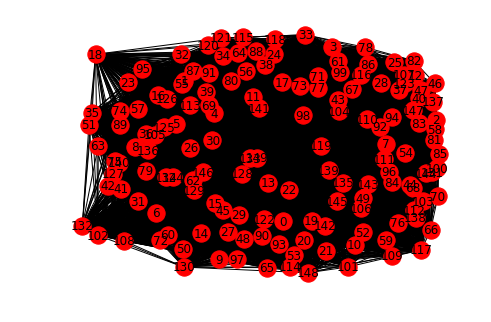

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(range(lda_model.num_topics))
k = np.percentile(np.array([e[2]['weight'] for e in edges]), 80)
print(k)
# G.add_edges_from(edges)
pos=nx.spring_layout(G,k=0.9,iterations=1)  
G.add_edges_from([e for e in edges if e[2]['weight'] < k])
nx.draw(G,pos,with_labels=True)

fig=plt.figure()
plt.figure(figsize=(50,50))
plt.show()
#plt.savefig('line_plot.png', dpi=1000)
#nx.write_graphml(G,'graph1.graphml')

### Parallel Betweenness Centrality

In [7]:
from multiprocessing import Pool
import itertools

In [8]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [9]:
def btwn_pool(G_tuple):
    print(nx.betweenness_centrality_source(*G_tuple))
    return nx.betweenness_centrality_source(*G_tuple)

In [10]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
    print(num_partitions)
    print(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [ ]:
bt = between_parallel(G)
top = 10

max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G.nodes())
bt_colors = [0]*len(G.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

17


In [13]:
between_parallel(G)

17
[(0, 1, 2, 3, 4, 5, 6, 7, 8), (9, 10, 11, 12, 13, 14, 15, 16, 17), (18, 19, 20, 21, 22, 23, 24, 25, 26), (27, 28, 29, 30, 31, 32, 33, 34, 35), (36, 37, 38, 39, 40, 41, 42, 43, 44), (45, 46, 47, 48, 49, 50, 51, 52, 53), (54, 55, 56, 57, 58, 59, 60, 61, 62), (63, 64, 65, 66, 67, 68, 69, 70, 71), (72, 73, 74, 75, 76, 77, 78, 79, 80), (81, 82, 83, 84, 85, 86, 87, 88, 89), (90, 91, 92, 93, 94, 95, 96, 97, 98), (99, 100, 101, 102, 103, 104, 105, 106, 107), (108, 109, 110, 111, 112, 113, 114, 115, 116), (117, 118, 119, 120, 121, 122, 123, 124, 125), (126, 127, 128, 129, 130, 131, 132, 133, 134), (135, 136, 137, 138, 139, 140, 141, 142, 143), (144, 145, 146, 147, 148, 149)]


In [15]:
print([G]*17)
print([True]*17)
print([None]*17)
print([(0, 1, 2, 3, 4, 5, 6, 7, 8), (9, 10, 11, 12, 13, 14, 15, 16, 17), (18, 19, 20, 21, 22, 23, 24, 25, 26), (27, 28, 29, 30, 31, 32, 33, 34, 35), (36, 37, 38, 39, 40, 41, 42, 43, 44), (45, 46, 47, 48, 49, 50, 51, 52, 53), (54, 55, 56, 57, 58, 59, 60, 61, 62), (63, 64, 65, 66, 67, 68, 69, 70, 71), (72, 73, 74, 75, 76, 77, 78, 79, 80), (81, 82, 83, 84, 85, 86, 87, 88, 89), (90, 91, 92, 93, 94, 95, 96, 97, 98), (99, 100, 101, 102, 103, 104, 105, 106, 107), (108, 109, 110, 111, 112, 113, 114, 115, 116), (117, 118, 119, 120, 121, 122, 123, 124, 125), (126, 127, 128, 129, 130, 131, 132, 133, 134), (135, 136, 137, 138, 139, 140, 141, 142, 143), (144, 145, 146, 147, 148, 149)])

[<networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph.Graph object at 0x000001F944E99F28>, <networkx.classes.graph

In [ ]:
import timeit
start_time = timeit.default_timer()
print(start_time)
p = Pool(processes=None)
p.map(btwn_pool,
                        zip([G]*17,
                        [True]*17,
                        [None]*17,
                        [(0, 1, 2, 3, 4, 5, 6, 7, 8), (9, 10, 11, 12, 13, 14, 15, 16, 17), (18, 19, 20, 21, 22, 23, 24, 25, 26), (27, 28, 29, 30, 31, 32, 33, 34, 35), (36, 37, 38, 39, 40, 41, 42, 43, 44), (45, 46, 47, 48, 49, 50, 51, 52, 53), (54, 55, 56, 57, 58, 59, 60, 61, 62), (63, 64, 65, 66, 67, 68, 69, 70, 71), (72, 73, 74, 75, 76, 77, 78, 79, 80), (81, 82, 83, 84, 85, 86, 87, 88, 89), (90, 91, 92, 93, 94, 95, 96, 97, 98), (99, 100, 101, 102, 103, 104, 105, 106, 107), (108, 109, 110, 111, 112, 113, 114, 115, 116), (117, 118, 119, 120, 121, 122, 123, 124, 125), (126, 127, 128, 129, 130, 131, 132, 133, 134), (135, 136, 137, 138, 139, 140, 141, 142, 143), (144, 145, 146, 147, 148, 149)]))
elapsed = timeit.default_timer() - start_time
print(elapsed)

9.330638644892688e-07


#### Community Detection

In [14]:
!pip install community

  Running setup.py bdist_wheel for community: started
  Running setup.py bdist_wheel for community: finished with status 'done'
  Stored in directory: C:\Users\Mouna\AppData\Local\pip\Cache\wheels\0d\7e\f9\089b3c72d33c16b8d3edb17f64291511e5eea08b80e419faa7
Successfully built community


You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
! pip install python-louvain

  Running setup.py bdist_wheel for python-louvain: started
  Running setup.py bdist_wheel for python-louvain: finished with status 'done'
  Stored in directory: C:\Users\Mouna\AppData\Local\pip\Cache\wheels\f9\74\a9\14f051b00dddd46d71529db15507796da13a43ee2c0bc39def
Successfully built python-louvain


You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [67]:
from community import community_louvain
parts = community_louvain.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

In [73]:
plt.axis("off")
nx.draw_networkx(G, pos =pos, cmap = plt.get_cmap("jet"), node_color = values,node_size = 100, with_labels = False)

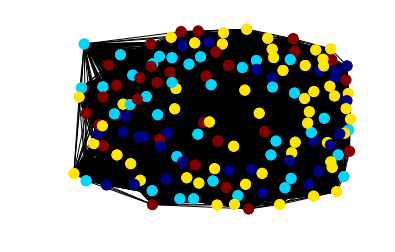

In [74]:
plt.show()

In [75]:
set(values)

{0, 1, 2, 3}

In [44]:
G.number_of_edges()

2235

In [41]:
G.number_of_edges()

8940

In [76]:
G.number_of_nodes()

150

In [52]:
help(community_louvain)

Help on module community.community_louvain in community:

NAME
    community.community_louvain - This module implements community detection.

FUNCTIONS
    best_partition(graph, partition=None, weight='weight', resolution=1.0, randomize=None, random_state=None)
        Compute the partition of the graph nodes which maximises the modularity
        (or try..) using the Louvain heuristices
        
        This is the partition of highest modularity, i.e. the highest partition
        of the dendrogram generated by the Louvain algorithm.
        
        Parameters
        ----------
        graph : networkx.Graph
           the networkx graph which is decomposed
        partition : dict, optional
           the algorithm will start using this partition of the nodes.
           It's a dictionary where keys are their nodes and values the communities
        weight : str, optional
            the key in graph to use as weight. Default to 'weight'
        resolution :  double, optional
    